In [2]:
import cv2
from utils import *
from model import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import IPython.display as display

In [5]:
# create_dataset()

In [20]:
display.Audio('dataset/texture/good/1-100038-A-14.wav')

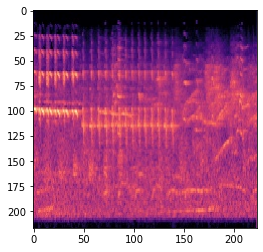

In [7]:
img = cv2.imread('dataset/spectrograms/good/1-100038-A-14.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=None)
plt.show()

In [21]:
display.Audio('dataset/texture/bad/1-101296-A-19.wav')

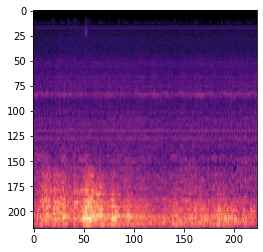

In [9]:
img = cv2.imread('dataset/spectrograms/bad/1-101296-A-19.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=None)
plt.show()

In [12]:
NUM_CLASSES = 2
EPOCHS = 200
BATCH_SIZE = 8
CHECKPOINT = ModelCheckpoint(filepath='models/texture_ckpt.h5', verbose=1, save_best_only=True)
EARLYSTOPPING = EarlyStopping(monitor='val_loss', patience=10)
PLATEAU = ReduceLROnPlateau(monitor='val_loss', patience=10)
COSINE = CosineAnnealingScheduler(T_max=EPOCHS, eta_max=0.003, eta_min=6e-6)
CALLBACKS = [CHECKPOINT, EARLYSTOPPING, PLATEAU]

In [13]:
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

In [14]:
train_loader = datagen.flow_from_directory(
    directory='dataset\\spectrograms',
    target_size=(128, 128),
    subset="training",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="binary"
)

valid_loader = datagen.flow_from_directory(
    directory='dataset\\spectrograms',
    target_size=(128, 128),
    subset="validation",
    batch_size=4,
    shuffle=True,
    class_mode="binary"
)

Found 61 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
model = buildModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [16]:
h = model.fit(train_loader, epochs=EPOCHS, steps_per_epoch=train_loader.n//train_loader.batch_size, validation_data=valid_loader, validation_steps=valid_loader.n//valid_loader.batch_size, callbacks=CALLBACKS)

Epoch 1/200
6/7 [========================>.....] - ETA: 0s - loss: 0.7305 - accuracy: 0.4167
Epoch 00001: val_loss improved from inf to 0.65934, saving model to models/texture_ckpt.h5
7/7 [==============================] - 2s 215ms/step - loss: 0.7089 - accuracy: 0.4643 - val_loss: 0.6593 - val_accuracy: 0.6500 - lr: 5.0000e-04
Epoch 2/200
7/7 [==============================] - ETA: 0s - loss: 0.5773 - accuracy: 0.8113
Epoch 00002: val_loss improved from 0.65934 to 0.23405, saving model to models/texture_ckpt.h5
7/7 [==============================] - 1s 177ms/step - loss: 0.5773 - accuracy: 0.8113 - val_loss: 0.2340 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 3/200
7/7 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9811
Epoch 00003: val_loss improved from 0.23405 to 0.05423, saving model to models/texture_ckpt.h5
7/7 [==============================] - 1s 209ms/step - loss: 0.0679 - accuracy: 0.9811 - val_loss: 0.0542 - val_accuracy: 0.9500 - lr: 5.0000e-04
Ep

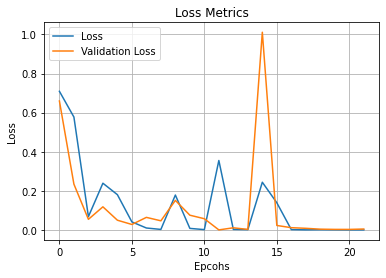

In [17]:
plt.plot(h.history['loss'], label='Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('Loss Metrics')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

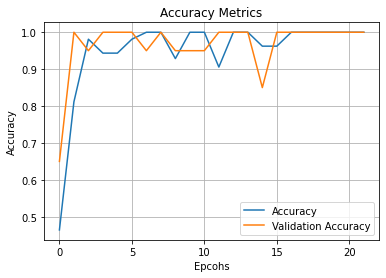

In [18]:
plt.plot(h.history['accuracy'], label='Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Metrics')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [19]:
model.save_weights('models/texture_binary_weights.h5')